# Linear Regression

Linear Regression (also called <b>ordinary least squares</b>) is the simplest example of <b>supervised learning</b> and <b>regression problem</b>.
* <b>Supervised Learning:</b> input dataset composed by input and labels $(x, y)$ and want to learn a mapping $x \longrightarrow y$
* <b>Regression:</b> the value $y$ to predict is continuous

## Problem Formulation

* $x$: inputs (or features)
* $y$: outputs (or targets) 
* $(x, y)$: one training example 
* $(x^{(i)},y^{(i)})$: <i>i-th</i> training example 
* $x^{(i)}_{j}$: <i>j-th</i> feature (or component) of the <i>i-th</i> training example 
* $m$: number of training examples
* $n_{x}$: number of input features
* $n = n_{x} + 1$: actual number of input features (adding the dummy feature $x_{0}= 0$)
* $\theta$: parameters
* $x_{0}=1$: intercept term (a dummy feature is added)

### Hypothesis
The <b>hypothesis h</b> is that the outpus is a linear function of the input features (fit a straight line).<br>
Then we decide to approximate $y$ as a linear function of $x$:

$$
h_\theta(x) = \theta_0x_0 + ... + \theta_nx_n 
$$

$$
h_\theta(x) = \sum_{j = 1}^{n}\theta_j x_j = \theta^{T}x 
$$

### Cost Function
The objective of the <b>learning algorithm</b> is to learn (choose) parameters $\theta$ such that the outputs $h_{\theta}(x)$ are close to the actual labels ($h_{\theta}(x) \approx y$) at least for the training examples.<br>
In order to do this, we want to <b>minimize</b> the <b>squared difference between predictions and the actual labels</b> over all $m$ training examples:

$$
\min_{\theta} \frac{1}{2}\sum_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
$$

So the <b>loss</b> function is defined as the distance for one training example:

$$
Loss_{\theta} (x^{(i)}, y^{(i)}) = \frac{1}{2}(h_\theta(x^{(i)}) - y^{(i)})^2
$$

and the <b>cost</b> function $J(\theta)$ is defined as the <b>sum</b> of the loss function over the $m$ training examples:

$$
\begin{align} J(\theta) & = \sum_{i = 1}^{m} Loss_{\theta} (x^{(i)}, y^{(i)})\\ & = \frac{1}{2}\sum_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 \end{align}
$$

For <b>linear regression</b>, the cost function $J(\theta)$, is defined as a sum of sqaure terms and then is is a quadratic function. For this reason, it not have local optimum but only the global optimum.  

### Batch Gradient Descent


The algorithm starts with some initial values of $\theta$ ($\theta = \vec{0}$ or random) and keep changing $\theta$ to reduce $J(\theta)$. <br>
* The <b>direction</b> to which take a little step to go downhill as fast as possible in the cost function (minimize $J(\theta)$ ) it determined by the direction of the <b>steepest descent</b>.
* The <b>size</b> of the change (update) is determined by a parameter $\alpha$ called <b>learning rate</b>.

Then the update rule becomes:
$$ 
\theta_j \mathrel{\mathop:}= \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta) \:\:\: \forall j
$$ 

Where $\theta_{j}$ is the <i>j-th</i> component of the parameters vector, and the update is performed for each component of $\theta$.

$$ 
\frac{\partial}{\partial\theta_j} J(\theta) = \frac{\partial}{\partial\theta_j} \frac{1}{2}\sum_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2  
$$

Firstly, compute the <b>partial derivate</b> with respect to <b>one training example</b>:

 
\begin{align*} \frac{\partial}{\partial\theta_j} J(\theta) & = \frac{\partial}{\partial\theta_j} \frac{1}{2}(h_\theta(x) - y)^2  \\ & = 2 \cdot \frac{1}{2} (h_\theta(x) - y) \cdot \frac{\partial}{\partial\theta_j} (h_\theta(x) - y) \\ & = (h_\theta(x) - y) \cdot \frac{\partial}{\partial\theta_j} \ (\sum_{j = 1}^{n}\theta_j x_j - y) \\ & = (h_\theta(x) - y) \cdot \frac{\partial}{\partial\theta_j} \ (\theta_0 x_0 \ + ... + \ \theta_j x_j + ... + \theta_n x_n - y) \\ & = (h_\theta(x) - y) \cdot (\frac{\partial}{\partial\theta_j} \ \theta_0 x_0 \ + ... + \ \frac{\partial}{\partial\theta_j} \ \theta_j x_j \ + ... + \ \frac{\partial}{\partial\theta_j} \ \theta_n x_n - \frac{\partial}{\partial\theta_j} \ y) \\ & = (h_\theta(x) - y) \cdot \ (0 \ + ... + \ 0 \ + \ x_j \ + \ 0 \ + ... + \ 0 \ - \ 0)  \\ & = (h_\theta(x) - y)\ x_j \end{align*} 


To obtain the <b>partial derivate</b> with respect to the <b>cost function</b> $J(\theta)$ we needs to sum over all training examples (the derivate of sum is the sum of derivate):

$$ 
\frac{\partial}{\partial\theta_j} J(\theta) = \sum_{i = 1}^{m} (h_\theta(x^{(i)}) - y^{(i)})\ x_j^{(i)}
$$

The final <b>update rule</b> for <b> batch gradient descent </b>becomes: 

$$ 
\theta_j \mathrel{\mathop:}= \theta_j - \alpha \sum_{i = 1}^{m} (h_\theta(x^{(i)}) - y^{(i)})\ x_j^{(i)} \:\:\: \forall j
$$ 


The <b>batch gradient descent</b> algorithm consists of update until convergence the update rule defined above
At each iteration of batch gradient descent the algorithm scans through all the training examples (for this the term batch)

Repeat { <br>
$ \qquad \qquad \theta_j := \theta_j - \alpha \sum_{i = 1}^{m} (h_\theta(x^{(i)}) - y^{(i)})\ x_j^{(i)} \:\:\: \forall j$ <br>
}

The main disadvantage of <b>batch gradient descent</b> is that, in order to make one update to the parameters $\theta$, is needed to scan the entire training set. Then, every single step of batch gradient descent update becomes very slow because needs to iterate over all the training set.

### Stochastic Gradient Descent

In <b>stochastic gradient descent</b>, instead of scan through the entire training set to make one update, it updates the paramters $\theta$ computing the derivate of just one training example. <br>
On average, the algorithm goes nearby the global minimum but never exactly converges (it oscillates near the global minimum). <br>
The <b>stochastic gradient descent</b>, allows the learning algorithm to make much faster progress.

Repeat { <br>
&emsp; &emsp; for $i=1$ to m { <br>
$ \qquad \qquad \qquad \quad \theta_j := \theta_j - \alpha (h_\theta(x^{(i)}) - y^{(i)})\ x_j^{(i)} \:\:\: \forall j$ <br>
&emsp; &emsp;    } <br>
}


### OUTLINE:

- [1. Explicit for loops Linear Regression](#1)
  - [1.1 Stochastic Gradient Descent](#1-1)
  - [1.2 Batch Gradient Descent](#1-2)
  - [1.3 Execution time comparison](#1-3)
- [2. Vectorized Linear Regression](#2)
  - [2.1 Vectorization](#2-1)
  - [2.2 Mini-Batch Gradient Descent](#2-2)
  

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

<a name="1"></a>

# Explicit for loops Linear Regression

The <b>SlowLinearRegression class</b> implements the linear regression algorithm with both <b>gradient descent</b> and <b>stochastic gradient descent</b>. <br>
It uses only <b>explicit for loops</b> (not expliting python vectorization) and, consequently, resulting very slow. 

In [2]:
class SlowLinearRegression:
    """ Linear Regression class: implementation of a linear regression model with numpy (without using vectorization).

    Attributes:
    """

    def __init__(self):
        self.INIT_PARAMETERS = {"zero", "random"}
        self.OPTIMIZER = {"batch_gradient_descent", "stochastic_gradient_descent"}
        self.theta = None
        return

    def fit(self, X, Y, iterations, learning_rate, init_parameters="zero", optimizer="stochastic_gradient_descent", 
            print_n_iterstions=100):
        """
        Fits the linear regression model with the input training examples.

        Args:
            X: input features (n_samples, n_features)
            Y: input labels (n_samples, 1)
            iterations: number of iterations of the training loop
            init_parameters: {"zero","random"} string defining the parameters initiation method
            optimizer: {"batch_gradient_descent","stochastic_gradient_descent"} string with the optimization algorithm
        Returns:
            None
        """

        # First dimension of X,Y (n_samples) must be the same
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Error: first dimension of X {} and Y {} not matches.".format(X.shape[0], Y.shape[0]))

        m = X.shape[0]
        nx = X.shape[1]
        n = nx + 1

        # Add intercept term (1.0 in the first component of each training example)
        X = np.insert(X, 0, 1.0, axis=1)

        # Initialize paramters theta
        self._init_weights(n, init_parameters)

        if optimizer == "batch_gradient_descent":
            history, execution_time = self.batch_gradient_descent(X, Y, m, n, iterations, learning_rate, print_n_iterstions)
        if optimizer == "stochastic_gradient_descent":
            history, execution_time = self.batch_gradient_descent(X, Y, m, n, iterations, learning_rate, print_n_iterstions)
        return history, execution_time

    def batch_gradient_descent(self, X, Y, m, n, iterations, learning_rate, print_n_iterstions):
        start_time = time.time()
        
        history = []
        for iteration in range(iterations):
            J = 0
            grads_sum = [0] * n
            # Loop over each training example
            for i in range(m):
                x_i = X[i]
                y_i = Y[i]

                h_i = self._compute_hypothesis(x_i)

                diff_i = h_i - y_i
                loss_i = 1/2*(diff_i)**2

                J += loss_i

                # Loop over each feature
                for j in range(n):
                    grads_sum[j] += diff_i * x_i[j]
                
            history.append(J)

            if iteration and iteration % print_n_iterstions == 0:
                print("Iteration {} - Cost {}".format(iteration, J))

            # Loop over each feature
            for j in range(n):
                self.theta[j] = self.theta[j] - learning_rate * grads_sum[j]
                
        execution_time = time.time() - start_time

        return history, execution_time

    def stochastic_gradient_descent(self, X, Y, m, n, iterations, learning_rate, print_n_iterstions):
        start_time = time.time()
        
        history = []
        for iteration in range(iterations):
            J = 0
            # Loop over each training example
            for i in range(m):
                x_i = X[i]
                y_i = Y[i]

                h_i = self._compute_hypothesis(x_i)

                diff_i = h_i - y_i
                loss_i = 1 / 2 * (diff_i) ** 2

                J += loss_i

                # Loop over each feature
                for j in range(n):
                    self.theta[j] = self.theta[j] - learning_rate * (diff_i * x_i[j])
                    
            history.append(J)

            if iteration and iteration % print_n_iterstions == 0:
                print("Iteration {} - Cost {:.2f}".format(iteration, J))
                
        execution_time = time.time() - start_time 

        return history, execution_time

    def _compute_hypothesis(self, x_i):
        if x_i.shape[0] != self.theta.shape[0]:
            raise ValueError("Error: Input features dimension must be %d." % self.self.theta.shape[0])
        
        h = 0
        for j in range(len(self.theta)):
            h += x_i[j] * self.theta[j]
        return h

    def predict(self, x):
        x = np.insert(x, 0, 1.0, axis=0)
        return self._compute_hypothesis(x)

    def _init_weights(self, n, init_parameters="zero"):
        """ initiates the paramters as zero or random. """
        if init_parameters not in self.INIT_PARAMETERS:
            raise ValueError("Error: init_parameters must be one of %s." % self.INIT_PARAMETERS)

        if init_parameters == "zero":
            # Initialize paramters with zero values
            self.theta = np.zeros((n, 1), dtype=float)

        if init_parameters == "random":
            # Initialize paramters with random values
            self.theta = np.random.rand(n, 1)
        return

In [3]:
def plot_data(X, Y, theta=None):
    plt.figure(figsize=(20,10))
    XY = plt.scatter(X, Y, label="True Labels")
    if theta is not None:
        H = theta[0]+theta[1]*X
        XH = plt.plot(X, H, color='red', label="Estimated Labels")
        
    plt.xlabel("input X")
    plt.ylabel("output Y")
    
    plt.legend()

    plt.show()
    return

def plot_history(history):
    plt.figure(figsize=(20,10))
    x = range(len(history))
    plt.scatter(x, history, label="J")
    plt.xlabel("Iteration")
    plt.ylabel("Cost Function J")
    plt.show()
    return

### Generate input data

In [4]:
m = 1000 # Number of training examples
nx = 1 # Number of input features

# Generate X from a random distribution with shape (m, nx) 
X = np.random.rand(m, nx)

# Generate a noise vector of shape (m, 1)
epsilon = np.random.normal(0, 0.1, m)

# Generate Y = (X*2)+2 + noise
Y = (np.sum(X, axis=1)*2+2)+epsilon

In [5]:
Y = np.reshape(Y, (Y.shape[0], 1))

In [6]:
print(X.shape)

(1000, 1)


In [7]:
print(Y.shape)

(1000, 1)


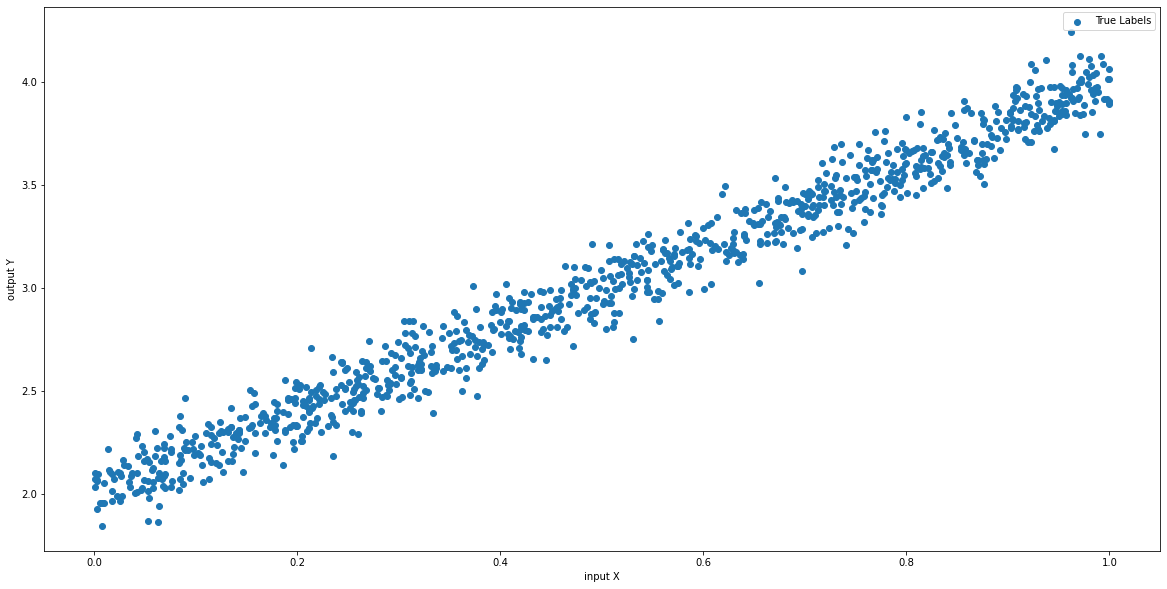

In [8]:
if X.shape[1] == 1:
    plot_data(X, Y)

<a name="1-1"></a>

## 1.1 Stochastic Gradient Descent

In [9]:
learning_rate = 0.0001
iterations = 1000
init_parameters="random" # Random or Zero init
optimizer = "stochastic_gradient_descent" # stochastic_gradient_descent or batch_gradient_descent

sgd_SLR = SlowLinearRegression()

history, execution_time = sgd_SLR.fit(X=X,
                                      Y=Y,
                                      iterations=iterations,
                                      learning_rate=learning_rate,
                                      init_parameters=init_parameters, 
                                      optimizer=optimizer)

Iteration 100 - Cost [6.81092554]
Iteration 200 - Cost [5.31505025]
Iteration 300 - Cost [4.92155476]
Iteration 400 - Cost [4.81804432]
Iteration 500 - Cost [4.79081552]
Iteration 600 - Cost [4.78365288]
Iteration 700 - Cost [4.78176873]
Iteration 800 - Cost [4.78127309]
Iteration 900 - Cost [4.78114271]


In [10]:
print("{} with {} input examples and {} features and {} iterations: takes {:.2f} seconds ".format(optimizer, 
                                                                                                  m, nx, iterations, 
                                                                                                  execution_time))

stochastic_gradient_descent with 1000 input examples and 1 features and 1000 iterations: takes 12.71 seconds 


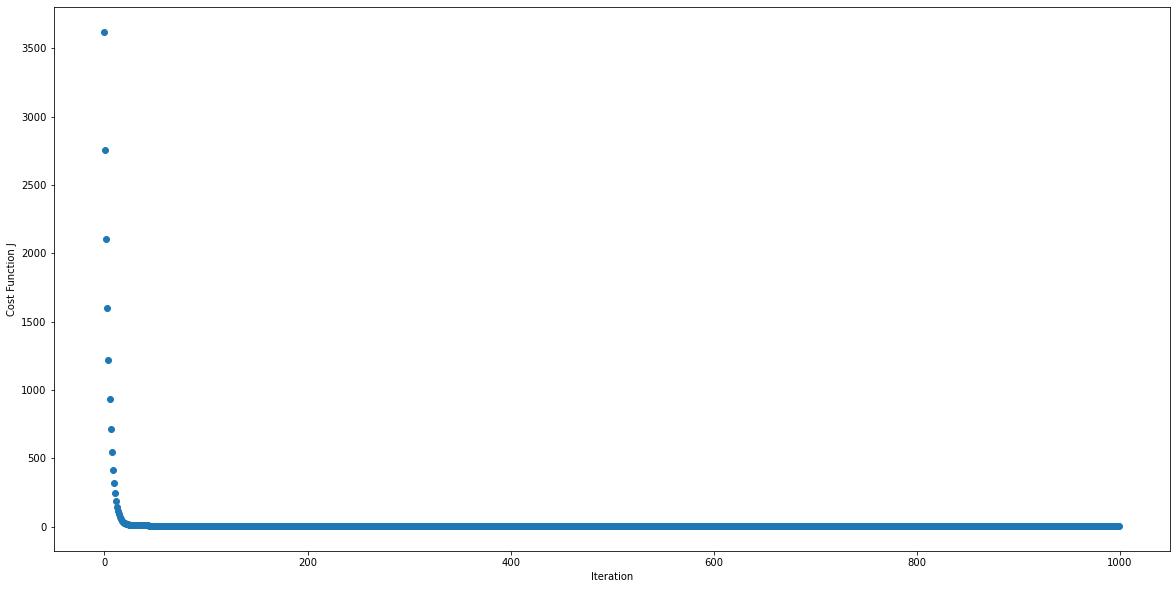

In [11]:
plot_history(history)

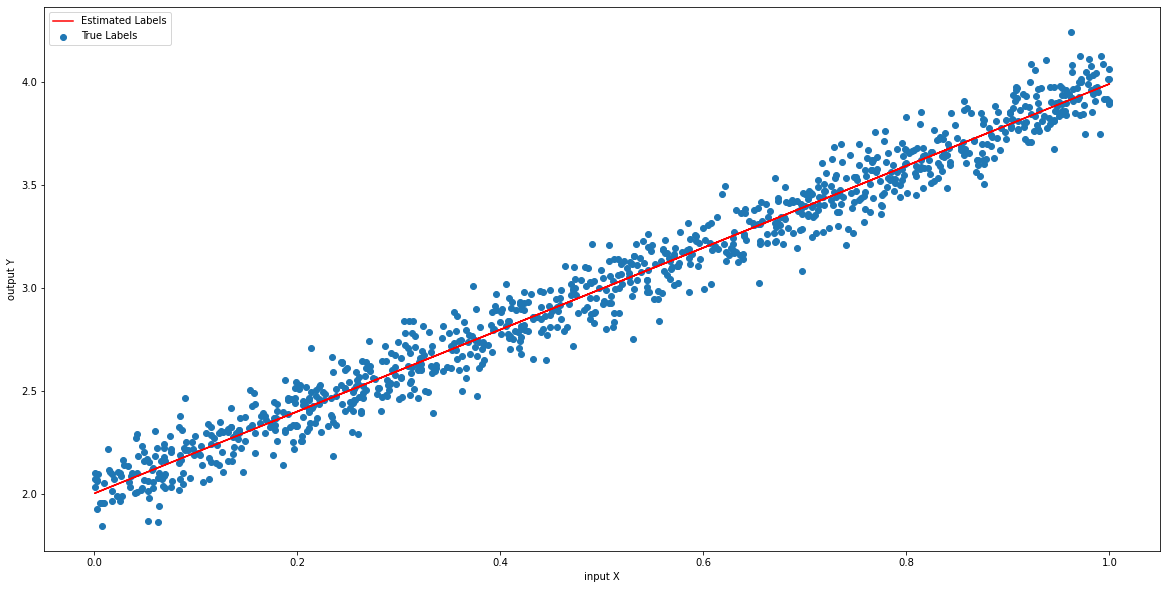

In [12]:
learned_theta = sgd_SLR.theta

if X.shape[1] == 1:
    plot_data(X, Y, learned_theta)

In [13]:
x = np.array([3])

y_true = (x*2)+2
y_hat = sgd_SLR.predict(x)

print("Predicted label {} for input {} with true label {}.".format(y_hat, x, y_true))

Predicted label [7.96437407] for input [3] with true label [8].


<a name="1-2"></a>

## 1.2 Batch Gradient Descent 

In [14]:
learning_rate = 0.0001
iterations = 1000
init_parameters="random" # Random or Zero init
optimizer = "batch_gradient_descent" # stochastic_gradient_descent or batch_gradient_descent

bgd_SLR = SlowLinearRegression()

history, execution_time = bgd_SLR.fit(X=X,
                                      Y=Y,
                                      iterations=iterations,
                                      learning_rate=learning_rate,
                                      init_parameters=init_parameters, 
                                      optimizer=optimizer)

Iteration 100 - Cost [10.65791529]
Iteration 200 - Cost [6.32701505]
Iteration 300 - Cost [5.18775582]
Iteration 400 - Cost [4.88806949]
Iteration 500 - Cost [4.8092359]
Iteration 600 - Cost [4.78849843]
Iteration 700 - Cost [4.78304337]
Iteration 800 - Cost [4.78160839]
Iteration 900 - Cost [4.78123091]


In [15]:
print("{} with {} input examples and {} features and {} iterations: takes {:.2f} seconds ".format(optimizer, 
                                                                                                  m, nx, iterations, 
                                                                                                  execution_time))

batch_gradient_descent with 1000 input examples and 1 features and 1000 iterations: takes 12.64 seconds 


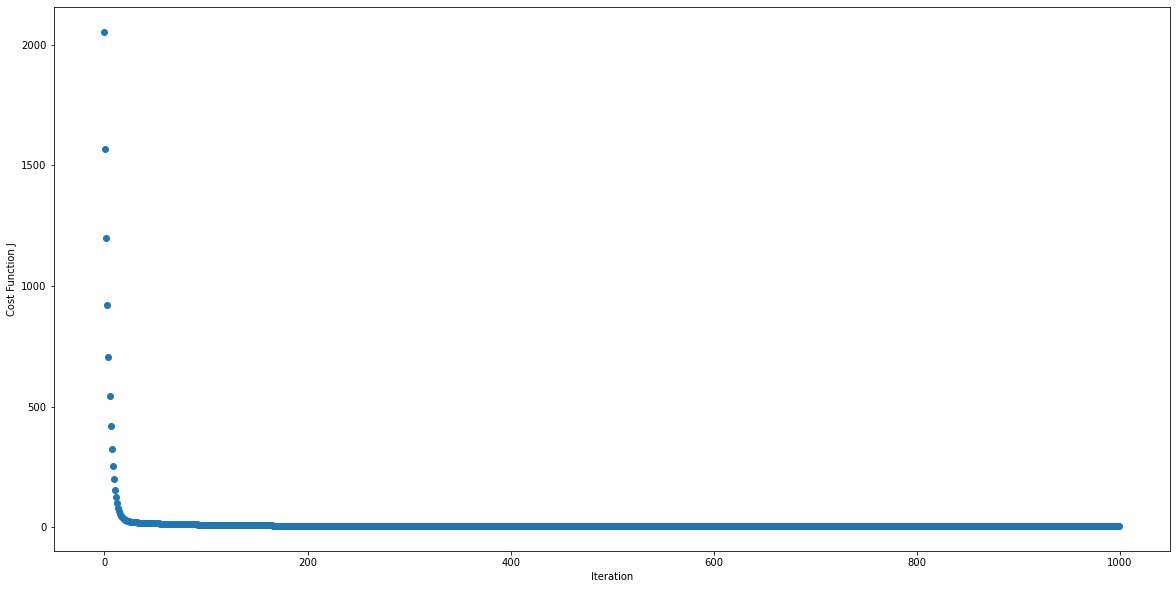

In [16]:
plot_history(history)

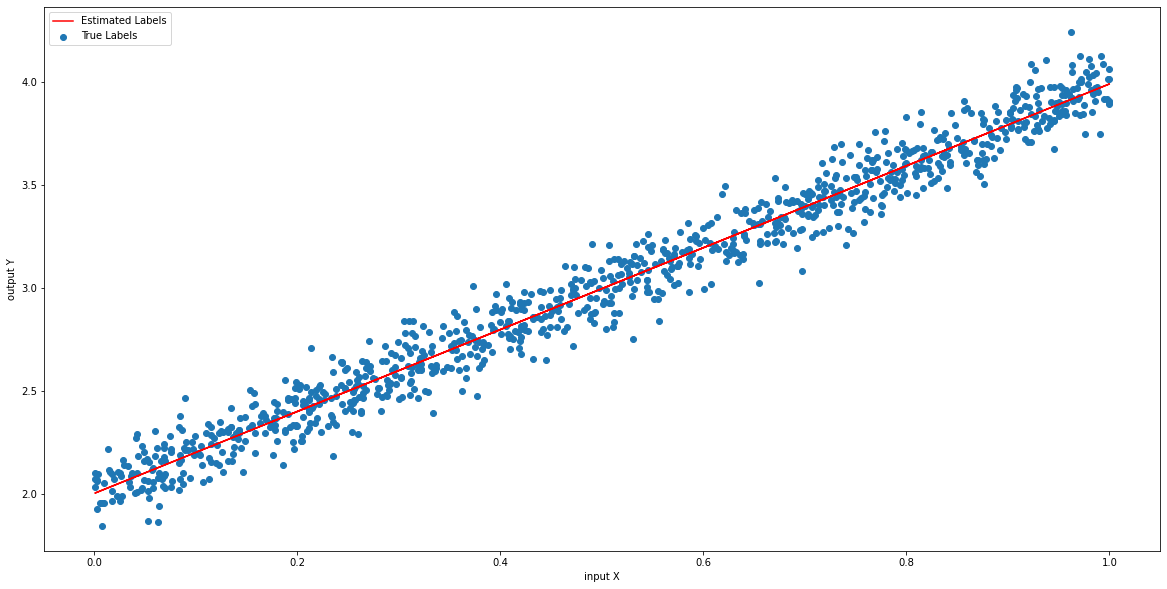

In [17]:
learned_theta = bgd_SLR.theta

if X.shape[1] == 1:
    plot_data(X, Y, learned_theta)

In [18]:
x = np.array([3])

y_true = (x*2)+2
y_hat = bgd_SLR.predict(x)

print("Predicted label {} for input {} with true label {}.".format(y_hat, x, y_true))

Predicted label [7.96345618] for input [3] with true label [8].


<a name="1-3"></a>

## 1.3 Execution Time Comparison


In [19]:
m = 10000 # Number of training examples
nx = 100 # Number of input features

# Generate X from a random distribution with shape (m, nx) 
X = np.random.rand(m, nx)

# Generate a noise vector of shape (m, 1)
epsilon = np.random.normal(0, 0.1, m)

# Generate Y = (X*2)+2 + noise
Y = (np.sum(X, axis=1)*2+2)+epsilon

In [20]:
learning_rate = 0.000001
iterations = 100
init_parameters="random" # Random or Zero init
optimizer_1 = "stochastic_gradient_descent" # stochastic_gradient_descent or batch_gradient_descent
optimizer_2 = "batch_gradient_descent" # stochastic_gradient_descent or batch_gradient_descent

In [21]:
sgd_SLR = SlowLinearRegression()

history, execution_time = sgd_SLR.fit(X=X,
                                      Y=Y,
                                      iterations=iterations,
                                      learning_rate=learning_rate,
                                      init_parameters=init_parameters, 
                                      optimizer=optimizer_1,
                                      print_n_iterstions=10)

print("{} with {} input examples and {} features and {} iterations: takes {:.2f} seconds ".format(optimizer_1, 
                                                                                                  m, nx, iterations, 
                                                                                                  execution_time))

Iteration 10 - Cost [77216.48772666]
Iteration 20 - Cost [3629.32315495]
Iteration 30 - Cost [3401.01019289]
Iteration 40 - Cost [3346.64295794]
Iteration 50 - Cost [3293.56721623]
Iteration 60 - Cost [3241.36110291]
Iteration 70 - Cost [3190.00928425]
Iteration 80 - Cost [3139.49762525]
Iteration 90 - Cost [3089.81222943]
stochastic_gradient_descent with 10000 input examples and 100 features and 100 iterations: takes 435.90 seconds 


In [22]:
bgd_SLR = SlowLinearRegression()

history, execution_time = bgd_SLR.fit(X=X,
                                      Y=Y,
                                      iterations=iterations,
                                      learning_rate=learning_rate,
                                      init_parameters=init_parameters, 
                                      optimizer=optimizer_2,
                                      print_n_iterstions=10)

print("{} with {} input examples and {} features and {} iterations: takes {:.2f} seconds ".format(optimizer_2, 
                                                                                                  m, nx, iterations, 
                                                                                                  execution_time))

Iteration 10 - Cost [74341.75480095]
Iteration 20 - Cost [3638.6090178]
Iteration 30 - Cost [3415.7467701]
Iteration 40 - Cost [3360.08614817]
Iteration 50 - Cost [3305.74623878]
Iteration 60 - Cost [3252.32001748]
Iteration 70 - Cost [3199.79107341]
Iteration 80 - Cost [3148.14418171]
Iteration 90 - Cost [3097.36438031]
batch_gradient_descent with 10000 input examples and 100 features and 100 iterations: takes 432.55 seconds 


<a name="2"></a>

# 2. Vectorization and Mini-Batch Gradient Descent

$$
x^{(i)} = \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_{n} \end{bmatrix} \ \ , \ \ \ \ \ \ \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_{n} \end{bmatrix} , \ \ where \ \ \ x_{0} = 1\
$$
<br><br>
$$
X = \begin{bmatrix}
\newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}}
\ \ (x^{(1)})^T \ \ \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \\
 \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \ \ (x^{(2)})^T  \ \ \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \\
  \vdots  \\
 \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \ \ (x^{(m)})^T \ \ \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \\
\end{bmatrix} \ \ \ , \ \ \ Y = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix} \ \ \ , \ \ \ \theta = \begin{bmatrix} \theta_{1} \\ \theta_{2} \\ \vdots \\ \theta_{n} \end{bmatrix}
$$
<a name="2-1"></a>
## Vectorized Hypothesis

$$ 
\begin{align} H_\theta(X) = X \theta  =  \ & \begin{bmatrix}
\newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}}
\ \ (x^{(1)})^T \ \ \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \\
 \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \ \ (x^{(2)})^T  \ \ \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \\
  \vdots  \\
 \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \ \ (x^{(m)})^T \ \ \newcommand*{\horzbar}{\rule[.5ex]{5ex}{0.5pt}} \\
\end{bmatrix} \cdot \begin{bmatrix} \theta_{1} \\ \theta_{2} \\ \vdots \\ \theta_{n} \end{bmatrix}  = \begin{bmatrix} \sum_{j = 1}^{n} x_j^{(1)}\theta_j  \\ \sum_{j = 1}^{n} x_j^{(2)}\theta_j \\ \vdots \\ \sum_{j = 1}^{n} x_j^{(m)}\theta_j \end{bmatrix} = \begin{bmatrix} h_{\theta}(x^{(1)}) \\ h_{\theta}(x^{(2)}) \\ \vdots \\ h_{\theta}(x^{(m)}) \end{bmatrix}  \\ \\ &
 \ \ (m,n) \ \ \cdot  \ \ (n,1) \ \ = \ \  (m,1) \end{align} 
 $$ 
 
## Vectorized Cost Function
$$ 
\begin{align} J(\theta) & = \frac{1}{2m} \ (H_{\theta}(X) - Y)^T \ (h_{\theta}(X) - Y) \\  & = \frac{1}{2m} \ (X\theta - Y)^T \ (X\theta - Y) \end{align} 
$$ 

\begin{align*} 
Diff \ = \ (X\theta - Y) \ = \ (H_{\theta}(X) - Y) = \ & \begin{bmatrix} h_{\theta}(x^{(1)}) - y^{(1)} \\ h_{\theta}(x^{(2)}) - y^{(2)} \\ \vdots \\ h_{\theta}(x^{(m)}) - y^{(m)} \end{bmatrix} \\ \\  & \ \ \ \ \ \ \ \ \ \ \ (m,1) 
\end{align*}
A row vector times a column vecotor gives a real number: 
$$ \begin{align} (H_{\theta}(X) - Y)^T \ (H_{\theta}(X) - Y) & =  \begin{bmatrix} h_{\theta}(x^{(1)}) - y^{(1)} \ \ \ \ \ h_{\theta}(x^{(2)}) - y^{(2)} \ \ \ \ \ \cdots \ \ \ \ \ h_{\theta}(x^{(m)}) - y^{(m)} \end{bmatrix} \cdot \begin{bmatrix} h_{\theta}(x^{(1)}) - y^{(1)} \\ h_{\theta}(x^{(2)}) - y^{(2)} \\ \vdots \\ h_{\theta}(x^{(m)}) - y^{(m)} \end{bmatrix} \\ & = \sum_{i = 1}^{m} \ (h_{\theta}(x^{(i)}) - y^{(i)})^2 \end{align} 
$$
## Vectorized Gradient

\begin{align*} \nabla_{\theta}J(\theta) = & \frac{1}{m}X^T(X\theta - Y) \\
                                       = & \frac{1}{m}X^T(H(\theta) - Y) 
\end{align*} 

<br>
$$
\nabla_{\theta}J(\theta) = \frac{1}{m} \
\begin{bmatrix}
\newcommand*{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}} & \newcommand*{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}} &        & \newcommand*{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}} \\
    x^{(1)}    & x^{(2)}    & \ldots & x^{(m)}    \\
    \newcommand*{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}} & \newcommand*{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}} &        & \newcommand*{\vertbar}{\rule[-1ex]{0.5pt}{2.5ex}} 
\end{bmatrix} \ \begin{bmatrix} h_{\theta}(x^{(1)}) - y^{(1)} \\ h_{\theta}(x^{(2)}) - y^{(2)} \\ \vdots \\ h_{\theta}(x^{(m)}) - y^{(m)} \end{bmatrix} = \ \frac{1}{m} \ \begin{bmatrix} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_1^{(i)} \\ \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_2^{(i)} \\ \vdots \\ \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_n^{(i)} \end{bmatrix} 
$$
## Vectorized Update Rule

$$
\begin{align}
\theta = & \ \theta - \alpha \nabla_{\theta}J(\theta) \\ \\
      \begin{bmatrix} \theta_{1} \\ \theta_{2} \\ \vdots \\ \theta_{n} \end{bmatrix} = & \ \begin{bmatrix} \theta_1 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_1^{(i)} \\ \theta_2 - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_2^{(i)} \\ \vdots \\ \theta_n - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_n^{(i)} \end{bmatrix}
\end{align} 
$$
<a name="2-2"></a>
## Mini-Batch Gradient Descent
Repeat { <br>
&emsp; &emsp; for $x\_batch$ in X { <br>
$ \qquad \qquad \theta_j := \theta_j - \alpha \sum_{i = 1}^{batch\_size} (h_\theta(x\_batch^{(i)}) - y\_batch^{(i)})\ x\_batch_j^{(i)} \:\:\: \forall j$
<br>
&emsp; &emsp;  } <br>
}

In [23]:
class LinearRegression:
    """ Linear Regression class: implementation of a linear regression with vectorization.

    Attributes:
    """

    def __init__(self):
        self.INIT_PARAMETERS = {"zero", "random"}
        self.theta = None
        return

    def fit(self, X, Y, iterations, learning_rate, batch_size=512, init_parameters="zero", print_n_iterstions=100):
        """
        Fits the linear regression model with the input training examples.

        Args:
            X: input features (n_samples, n_features)
            Y: input labels (n_samples, 1)
            iterations: number of iterations of the training loop
            init_parameters: {"zero","random"} string defining the parameters initiation method
        Returns:
            None
        """

        # First dimension of X,Y (n_samples) must be the same
        if X.shape[0] != Y.shape[0]:
            raise ValueError("Error: first dimension of X {} and Y {} not matches.".format(X.shape[0], Y.shape[0]))

        m = X.shape[0]
        nx = X.shape[1]
        n = nx + 1

        # Add intercept term (1.0 in the first component of each training example)
        X = np.insert(X, 0, 1.0, axis=1)
        Y = np.reshape(Y, (Y.shape[0], 1))

        # Initialize paramters theta
        self._init_weights(n, init_parameters)

        history, execution_time = self.mini_batch_gradient_descent(X, Y, m, n, batch_size,
                                                                   iterations, learning_rate, print_n_iterstions)

        return history, execution_time

    def mini_batch_gradient_descent(self, X, Y, m, n, batch_size, iterations, learning_rate, print_n_iterstions):
        start_time = time.time()

        history = []
        for iteration in range(iterations):
            J = 0
            n_batch = m % batch_size
            n_batch_remainder = m // batch_size
            # Loop over each training example
            for i_batch in range(n_batch):
                X_batch = X[i_batch:i_batch + batch_size]
                Y_batch = Y[i_batch:i_batch + batch_size]

                # Compute the hypothesis for all Xs in the batch
                H = self._compute_hypothesis(X_batch)

                # Compute the difference between estimated y and actual label
                Diff = H - Y_batch
                
                # Sum the squared differences
                J += (1 / (2 * batch_size)) * np.dot(Diff.T, Diff)

                # Compute gradients
                Grad = (1 / batch_size) * np.dot(X_batch.T, Diff)

                # Update paramters theta
                self.theta -= learning_rate * Grad

                history.append(J)

            if n_batch_remainder != 0:
                X_batch = X[:-n_batch_remainder]
                Y_batch = Y[:-n_batch_remainder]

                # Compute the hypothesis for all Xs in the batch
                H = self._compute_hypothesis(X_batch)

                # Compute the difference between estimated y and actual label
                Diff = H - Y_batch
                
                # Sum the squared differences
                J += (1 / (2 * n_batch_remainder)) * np.dot(Diff.T, Diff)

                # Compute gradients
                Grad = (1 / n_batch_remainder) * np.dot(X_batch.T, Diff)

                # Update paramters theta
                self.theta -= learning_rate * Grad

            history.append(J)

            if iteration and iteration % print_n_iterstions == 0:
                print("Iteration {} - Cost {}".format(iteration, J))

        execution_time = time.time() - start_time

        return history, execution_time

    def _compute_hypothesis(self, X):
        if X.shape[1] != self.theta.shape[0]:
            raise ValueError("Error: Input features dimension must be %d." % self.self.theta.shape[0])
        return np.dot(X, self.theta)

    def predict(self, X):
        X = np.insert(X, 0, 1.0, axis=1)
        return self._compute_hypothesis(X)

    def _init_weights(self, n, init_parameters="zero"):
        """ initiates the paramters as zero or random. """
        if init_parameters not in self.INIT_PARAMETERS:
            raise ValueError("Error: init_parameters must be one of %s." % self.INIT_PARAMETERS)

        if init_parameters == "zero":
            # Initialize paramters with zero values
            self.theta = np.zeros((n, 1), dtype=float)

        if init_parameters == "random":
            # Initialize paramters with random values
            self.theta = np.random.rand(n, 1)
        return

In [24]:
m = 10000 # Number of training examples
nx = 100 # Number of input features

# Generate X from a random distribution with shape (m, nx) 
X = np.random.rand(m, nx)

# Generate a noise vector of shape (m, 1)
epsilon = np.random.normal(0, 0.1, m)

# Generate Y = (X*2)+2 + noise
Y = (np.sum(X, axis=1)*2+2)+epsilon

In [25]:
learning_rate = 0.00001
iterations = 1000
init_parameters = "random"  # Random or Zero init
batch_size = 1024
LR = LinearRegression()

history, execution_time = LR.fit(X=X,
                                 Y=Y,
                                 iterations=iterations,
                                 learning_rate=learning_rate,
                                 init_parameters=init_parameters,
                                 batch_size=batch_size)


Iteration 100 - Cost [[498.80653895]]
Iteration 200 - Cost [[366.7848383]]
Iteration 300 - Cost [[271.71834804]]
Iteration 400 - Cost [[203.07360546]]
Iteration 500 - Cost [[153.36690578]]
Iteration 600 - Cost [[117.26899858]]
Iteration 700 - Cost [[90.97580715]]
Iteration 800 - Cost [[71.76529904]]
Iteration 900 - Cost [[57.68483214]]


In [26]:
m = 1000000 # Number of training examples
nx = 1 # Number of input features

# Generate X from a random distribution with shape (m, nx) 
X = np.random.rand(m, nx)

# Generate a noise vector of shape (m, 1)
epsilon = np.random.normal(0, 0.1, m)

# Generate Y = (X*2)+2 + noise
Y = (np.sum(X, axis=1)*2+2)+epsilon

In [27]:
learning_rate = 0.0001
iterations = 1000
init_parameters = "random"  # Random or Zero init
batch_size = 1024
LR = LinearRegression()

history, execution_time = LR.fit(X=X,
                                 Y=Y,
                                 iterations=iterations,
                                 learning_rate=learning_rate,
                                 init_parameters=init_parameters,
                                 batch_size=batch_size,
                                 print_n_iterstions=100)

print(LR.theta)

Iteration 100 - Cost [[8.19170422]]
Iteration 200 - Cost [[7.85660361]]
Iteration 300 - Cost [[7.81629458]]
Iteration 400 - Cost [[7.81144732]]
Iteration 500 - Cost [[7.81086494]]
Iteration 600 - Cost [[7.81079515]]
Iteration 700 - Cost [[7.81078684]]
Iteration 800 - Cost [[7.81078588]]
Iteration 900 - Cost [[7.81078577]]
[[2.00206318]
 [1.99647847]]


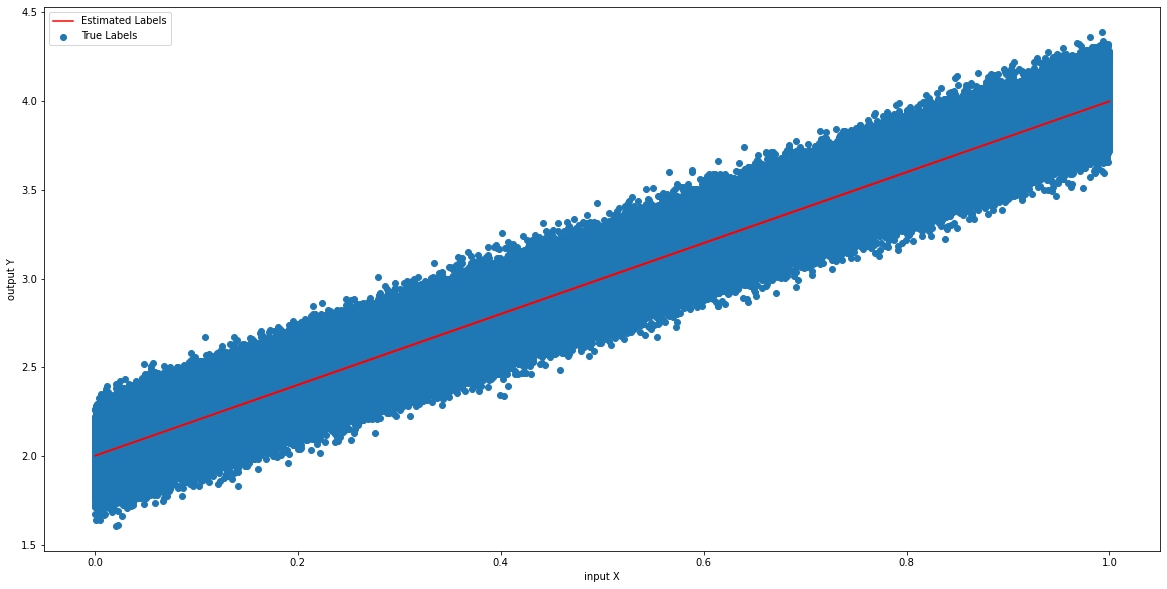

In [28]:
if X.shape[1] == 1:
    plot_data(X, Y, LR.theta)